기계학습 5주차

2019312072 정주호

In [9]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [7]:
heart = pd.read_csv("heart.csv")
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart.shape

(303, 14)

In [5]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
heart.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
#heart attack 데이터 : exng, cp, thalachh, oldpeak 순으로 heart attack과의 관계가 크다.
corr_matrix_heart = heart.corr()
print(corr_matrix_heart["output"].sort_values(ascending=False)) #피어슨상관계수

output      1.000000
cp          0.433798
thalachh    0.421741
slp         0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trtbps     -0.144931
age        -0.225439
sex        -0.280937
thall      -0.344029
caa        -0.391724
oldpeak    -0.430696
exng       -0.436757
Name: output, dtype: float64


{'boxes': [<matplotlib.lines.Line2D at 0x7ffbc0eba7d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7ffbc0e3d810>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ffbc0e45d90>],
 'means': [<matplotlib.lines.Line2D at 0x7ffbc0e45850>],
 'medians': [<matplotlib.lines.Line2D at 0x7ffbc0e45310>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7ffbc0ebad50>,
  <matplotlib.lines.Line2D at 0x7ffbc0e3d2d0>]}

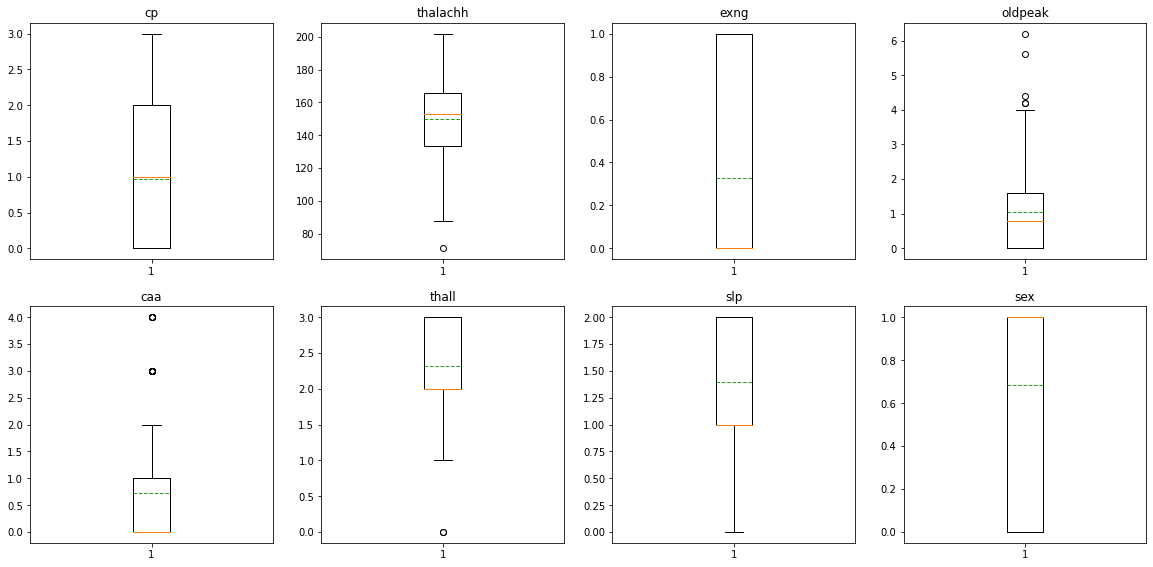

In [10]:
#boxplot으로 이상치 확인하기

plt.figure(figsize=(20,20))
plt.subplot(441)
plt.title('cp')
plt.boxplot(heart['cp'],meanline=True, showmeans=True)

plt.subplot(442)
plt.title('thalachh')
plt.boxplot(heart['thalachh'],meanline=True, showmeans=True)

plt.subplot(443)
plt.title('exng')
plt.boxplot(heart['exng'],meanline=True, showmeans=True)

plt.subplot(444)
plt.title('oldpeak')
plt.boxplot(heart['oldpeak'],meanline=True, showmeans=True)

plt.subplot(445)
plt.title('caa')
plt.boxplot(heart['caa'],meanline=True, showmeans=True)

plt.subplot(446)
plt.title('thall')
plt.boxplot(heart['thall'],meanline=True, showmeans=True)

plt.subplot(447)
plt.title('slp')
plt.boxplot(heart['slp'],meanline=True, showmeans=True)

plt.subplot(448)
plt.title('sex')
plt.boxplot(heart['sex'],meanline=True, showmeans=True)

In [12]:
#데이터셋을 Feature과 Result로 분류
#Feature는 상관관계가 높은 7개만 
X=heart[['caa','oldpeak','exng','cp','thalachh','slp','thall']]
y=heart['output']

In [14]:
#데이터 셋 분할
#학습데이터 60%
#검증데이터 20%
#테스트데이터 20%

from sklearn.model_selection import train_test_split

#전체데이터에서 학습데이터셋과 테스트셋으로 나눈다
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4)

print(X_train.shape)
print(X_test.shape)

(181, 7)
(122, 7)


In [27]:
from sklearn.neural_network import  MLPClassifier
from sklearn.metrics import roc_auc_score

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5,2),random_state=1)

clf.fit(X_train,y_train)

pos_prob = clf.predict_proba(X_test)

#print('The ROC AUC : {0:.3f}'.format(roc_auc_score(y_test, pos_prob[:,0])))

print(clf.score(X_test,y_test))
print(clf.n_layers_)
print(clf.n_iter_)
print(clf.loss_)

0.5081967213114754
4
4
0.6835781547623677


In [30]:
#Gridsearchcv

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

mlp = MLPClassifier(max_iter=100)

parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['logistic','tanh', 'relu'],
    'solver': ['lbfgs','sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}


clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train, y_train)

# Best paramete set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters found:
 {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}
0.718 (+/-0.225) for {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'lbfgs'}
0.569 (+/-0.007) for {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.569 (+/-0.007) for {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
0.729 (+/-0.230) for {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'lbfgs'}
0.569 (+/-0.007) for {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.625 (+/-0.154) for {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'ad

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [31]:
y_true, y_pred = y_test , clf.predict(X_test)

from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Results on the test set:
              precision    recall  f1-score   support

           0       0.89      0.57      0.69        60
           1       0.69      0.94      0.79        62

    accuracy                           0.75       122
   macro avg       0.79      0.75      0.74       122
weighted avg       0.79      0.75      0.75       122



In [43]:
from sklearn.neural_network import  MLPClassifier
from sklearn.metrics import roc_auc_score

clf = MLPClassifier(activation='relu',alpha=0.05, hidden_layer_sizes=100,learning_rate='constant', solver='adam',random_state=1)

clf.fit(X_train,y_train)

pos_prob = clf.predict_proba(X_test)
y_pred = clf.predict(X_test)

print('The ROC AUC : {0:.3f}'.format(roc_auc_score(y_test, pos_prob[:,1])))
print(clf.score(X_test,y_test))
print('Results on the test set:')
print(classification_report(y_test, y_pred))

The ROC AUC : 0.868
0.8032786885245902
Results on the test set:
              precision    recall  f1-score   support

           0       0.88      0.70      0.78        60
           1       0.76      0.90      0.82        62

    accuracy                           0.80       122
   macro avg       0.82      0.80      0.80       122
weighted avg       0.81      0.80      0.80       122



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
